In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
import re
import nltk
import sklearn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("stopwords")
from string import punctuation
stopwords = set(stopwords.words('english'))
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import collections
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Задание 1.

### Смотрим на данные

Считываем данные

In [32]:
df = pd.read_csv('Shoes_Data.csv')
df.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


Оставляем только колонки с ценой и описанием

In [33]:
df = df.drop(['title', 'rating', 'total_reviews', 'reviews', 'reviews_rating', 'Shoe Type'], axis='columns')

In [34]:
df.head()

,price,product_description
0,₹279.00,Elevate your style with this classy pair of Ru...
1,₹479.00,The product will be an excellent pick for you....
2,₹430.00,Flaunt with these stylish and unique red casua...
3,₹499.00,Robbie Jones Shoes Are Designed To Keeping In ...
4,₹499.00,Sparx is a spectacular range of footwear from ...


Убираем из цены обозначение валюты, переводим цену из строки в число, считаем лдину строки

In [35]:
df['price']=df['price'].apply(lambda x: str(x).replace('₹','') if '₹' in str(x) else str(x))
df['price']=df['price'].astype(float)
df['len_description'] = df['product_description'].apply(len)
df.head()

,price,product_description,len_description
0,279.0,Elevate your style with this classy pair of Ru...,222
1,479.0,The product will be an excellent pick for you....,78
2,430.0,Flaunt with these stylish and unique red casua...,398
3,499.0,Robbie Jones Shoes Are Designed To Keeping In ...,576
4,499.0,Sparx is a spectacular range of footwear from ...,1030


Строим график зависимости цены от длины описания

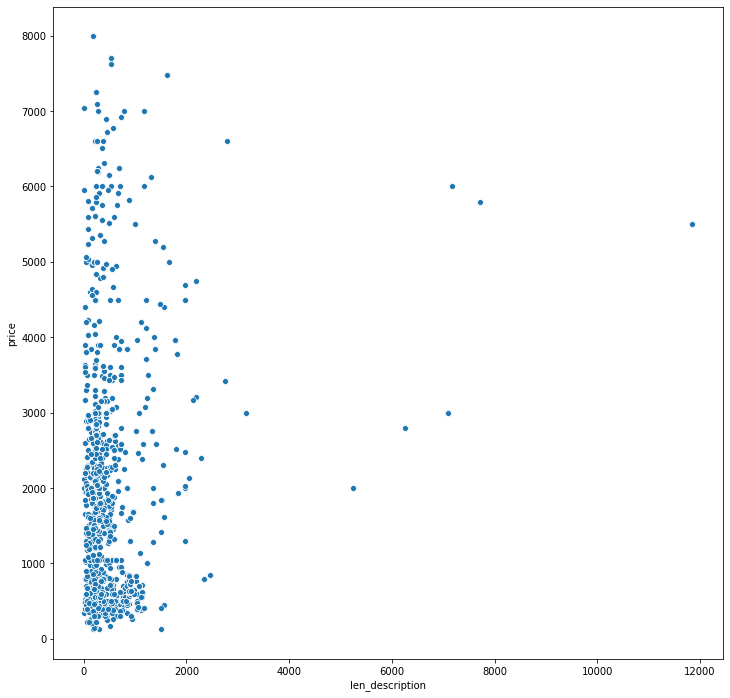

In [36]:
plt.figure(figsize=(12, 12))
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df['len_description'],y=df['price'],data=df)

Никакой зависимости нет. Создала список брендов, которые знаю. Может, цена будет зависеть от бренда обуви (или от её типа/предназначения). В таком случае надо сделать стемминг, чтобы *classy* не отличалось от *classical*, а *cool Puma's slippers* от *cool sleppers from Puma*.

### Препроцессинг

Токенизация, очистка от стоп-слов, стемминг

In [46]:
from nltk.stem import *
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [47]:
def preproc(s):
    tokens = word_tokenize(s.lower())
    clean_text = ' '.join([stemmer.stem(token) for token in tokens if token.isalpha()\
                          and token not in stopwords])
    return clean_text

In [48]:
df['clean_description'] = df['product_description'].apply(preproc)

Обновляем длину (не знаю, пригодится ли)

In [49]:
df['len_clean_description'] = df['clean_description'].apply(len)

In [50]:
df.head()

,price,product_description,len_description,clean_description,len_clean_description,brand
0,279.0,Elevate your style with this classy pair of Ru...,222,elev style classi pair run shoe hous clymb bra...,140,clymb
1,479.0,The product will be an excellent pick for you....,78,product excel pick ensur easi mainten,37,none
2,430.0,Flaunt with these stylish and unique red casua...,398,flaunt stylish uniqu red casual shoe per lates...,242,none
3,499.0,Robbie Jones Shoes Are Designed To Keeping In ...,576,robbi jone shoe design keep mind durabl well t...,337,none
4,499.0,Sparx is a spectacular range of footwear from ...,1030,sparx spectacular rang footwear hous relaxo fo...,672,none


Создала списки брендов, типов обуви и прилагательных, которые знаю

In [51]:
brands = ['nike', 'adidas', 'new balance', 'asics', 'puma', 'skechers', 'fila', 'gucci', 'bata', 'clymb', 'skyman', 'kavon', 'maddy', 'inkenzo', 'hush puppies', 'flavia']
adjs = ['tennis', 'classy', 'run', 'comf', 'casual', 'workout', 'gym', 'trandy', 'modern']
types = ['slippers', 'sneakers', 'heel', 'sandal']

Посмотрим сначала на бренды. Понадеюсь на стеммер от nltk и не буду стеммить названия брендов.

In [52]:
def choose_brand(s):
    ans = 0
    for b in brands:
        if b in s.lower():
            ans = b
    if not ans:
        ans = 'none'
    return ans

In [53]:
df['brand'] = df['product_description'].apply(choose_brand)

In [54]:
df.head()

,price,product_description,len_description,clean_description,len_clean_description,brand
0,279.0,Elevate your style with this classy pair of Ru...,222,elev style classi pair run shoe hous clymb bra...,140,clymb
1,479.0,The product will be an excellent pick for you....,78,product excel pick ensur easi mainten,37,none
2,430.0,Flaunt with these stylish and unique red casua...,398,flaunt stylish uniqu red casual shoe per lates...,242,none
3,499.0,Robbie Jones Shoes Are Designed To Keeping In ...,576,robbi jone shoe design keep mind durabl well t...,337,none
4,499.0,Sparx is a spectacular range of footwear from ...,1030,sparx spectacular rang footwear hous relaxo fo...,672,none


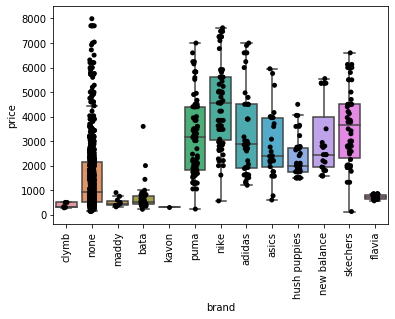

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='brand', y='price', data=df, showfliers=False, ax=ax)
sns.stripplot(x='brand', y='price', data=df, jitter=True, color='black', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

Очевидно, есть бренды, обувь которых находится в определённом ценовом диапазоне (например, вся обувь от *clymb*, *maddy* и *flavia* дешёвая), а от *asics* и *adidas* подороже. Однако критерий наличия бренла не универсальный (например, для *puma* это не работает).

Ещё один вариант - проверить наличие определённых прилагательных (описывающих стиль обуви) и типа обуви.

Но здесь мои прилагательные нужно постемить

In [56]:
def stems(words):
    stems = [stemmer.stem(w) for w in words]
    return stems

In [57]:
adjs = stems(adjs)

In [58]:
def choose_adj(s):
    ans = 0
    for a in adjs:
        if a in s.lower():
            ans = a
    if not ans:
        ans = 'none'
    return ans

In [68]:
df['adj'] = df['clean_description'].apply(choose_adj)

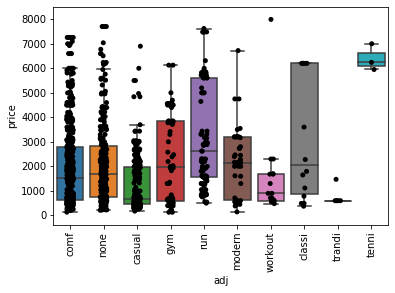

In [69]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='adj', y='price', data=df, showfliers=False, ax=ax)
sns.stripplot(x='adj', y='price', data=df, jitter=True, color='black', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

Обувь для тенниса подороже, а для тренировок и трендовая (хотя тут дело в слове *trandy*, наверное) - подешевле, но по поводу остального - большой разброс.

Ну и теперь посомтрим на типы обуви, которые тоже надо постеммить.

In [61]:
types = stems(types)

In [62]:
def choose_type(s):
    ans = 0
    for t in types:
        if t in s.lower():
            ans = t
    if not ans:
        ans = 'none'
    return ans

In [70]:
df['type'] = df['clean_description'].apply(choose_type)

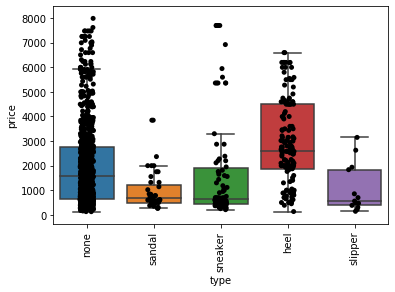

In [71]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='type', y='price', data=df, showfliers=False, ax=ax)
sns.stripplot(x='type', y='price', data=df, jitter=True, color='black', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

Слиперы, сандалии и кроссовки в среднем подешевле, чем каблуки, но наличие типа обучи всё равно назвать критерием вряд ли можно.

Ещё можно такую же с материалами, но я не знаю, как они на английском все называются :(

## Векторизация

#### TF-IDF

In [73]:
corpus = df['clean_description']
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus)
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state=42)

#### Bag of Words

In [79]:
bow = CountVectorizer()
X_bow = bow.fit_transform(corpus)
y = df['price'].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X_bow, y, random_state=42)

## Регрессия

### Линейная регрессия на TF-IDF, подбор параметров

In [78]:
lg = LinearRegression()
lg_params = {'fit_intercept': [True, False],
                 'normalize': [True, False]
                 }
grid_search_1 = GridSearchCV(lg,
                           param_grid=lg_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)
grid_search_1.fit(X_train, y_train)

print('Best score: {}'.format(grid_search_1.best_score_))
print('Best parameters: {}'.format(grid_search_1.best_params_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: -919.3076542132072
Best parameters: {'fit_intercept': False, 'normalize': True}


### Линейная регрессия на BoW, подбор параметров

In [80]:
grid_search_2 = GridSearchCV(lg,
                           param_grid=lg_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search_2.fit(X2_train, y2_train)

print('Best score: {}'.format(grid_search_2.best_score_))
print('Best parameters: {}'.format(grid_search_2.best_params_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: -1357.7705180861906
Best parameters: {'fit_intercept': False, 'normalize': True}


### Ridge на TF-IDF, подбор параметров 

In [105]:
ridge = Ridge()
ridge_params = {'alpha': [0.05, 0.1, 0.15, 0.5, 1, 2, 10]}
grid_search_3 = GridSearchCV(ridge,
                           param_grid=ridge_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1,
                           cv=5)

grid_search_3.fit(X_train, y_train)

print('Best score: {}'.format(grid_search_3.best_score_))
print('Best parameters: {}'.format(grid_search_3.best_params_))

Best score: -631.7316703442759
Best parameters: {'alpha': 0.05}


### Ridge на BoW, подбор параметров

In [106]:
grid_search_4 = GridSearchCV(ridge,
                           param_grid=ridge_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1,
                           cv=5)

grid_search_4.fit(X2_train, y2_train)

print('Best score: {}'.format(grid_search_4.best_score_))
print('Best parameters: {}'.format(grid_search_4.best_params_))

Best score: -716.2385498755879
Best parameters: {'alpha': 1}


## Результаты

Лучше всего работает Ridge на TF-IDF с маленьким alpha. Посмотрим, что работает плохо, а что хорошо.

In [109]:
preds = grid_search_3.predict(X_test)
mean_absolute_error(y_test, preds)

619.9294037599369

Посмотрим на график остатков

In [114]:
y_train_pred = grid_search_3.predict(X_train)

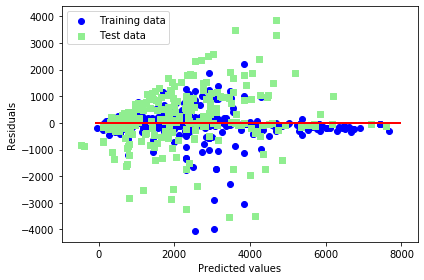

In [119]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(preds,  preds - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin = -100, xmax = 8000, lw=2, color='red')
plt.tight_layout()

В целом, всё достаточно близко к 0, особо заметных паттернов нет (кроме небольшой клиновидности от 0 до 4000 по оси X). Минусы: есть выбросы, наблюдается гетероскедастичность на тестовой выборке.

Можно ещё посмотреть на разницу между предсказанными ценами и реальными

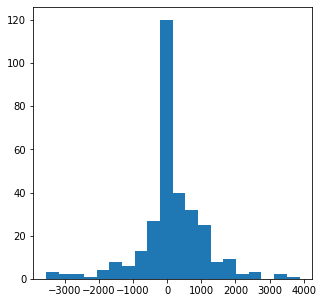

In [137]:
plt.figure(figsize=(5, 5))
resids = [preds[i] - y_test[i] for i in range(len(preds))]
#for i in range(len(preds)):
    #resids = preds[i] - y_test[i]
ax = plt.hist(x=resids, bins=20)

Ну, по-моему выглядит неплохо: значений около 0 достаточно много. Тех предсказаний, которые назвали бОльшую цену, чем есть на самом деле (предсказанное - реальное > 0), больше, чем тех, которые предсказали меньшую цену. То есть, модель хорошо справляется с ценами поменьше. Может, это потому что маленький цен в принципе больше? 

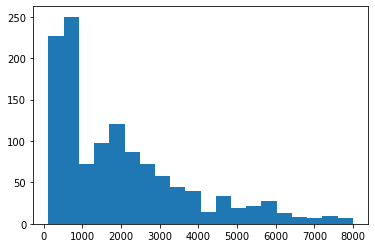

In [138]:
ax = plt.hist(x=df['price'], bins=20)

В целом, так и есть. То есть, модель, видимо, работает так: предскажи что-нибудь от 100 до 1500 и в большинстве случаев попадёшь.

## Задание 2

Взяла преобразование данных с kaggle

Загружаем датафрейм заново, а то я его в прошлой задаче меняла

In [140]:
df = pd.read_csv('Shoes_Data.csv')

### Препроцессинг

Переходим в формат 1 отзыв к 1 оценке

In [141]:
rew  = []
rat = []

for j in df.index:
    lst = [i for i in df.iloc[j].reviews.split('||')]
    for k in lst:
        rew.append(k)
        
for j in df.index:
    lst = [i for i in df.iloc[j].reviews_rating.split('||')]
    for k in lst:
        rat.append(k)
        
df = pd.DataFrame(list(zip(rew, rat)),
               columns =['Review', 'Review_rating'])

Убираем мусор

In [146]:
def lower(text):
    return text.lower()

def remove_punctuation(text):
    return text.translate(str.maketrans('','', punctuation))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])

# Removing all words with digits and standalone digits
def remove_digits(text):
    return re.sub(r'\d+', '', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Removing all non-printable symbols like "ड", "ட"
def remove_non_printable(text):
    text = text.encode("ascii", "ignore")
    return text.decode()
        
# One function to clean it all
def clean_text(text):
    text = lower(text)
    text = remove_punctuation(text)
    #text = remove_stopwords(text)
    text = remove_digits(text)
    text = remove_emoji(text)
    text = remove_non_printable(text)
    return text

# Returns first digit entry in a string
def get_first_digit(text):
    match = re.search(r'\d', text)
    return match[0]

In [147]:
df['Review_rating']=df['Review_rating'].apply(get_first_digit)
df['clean_review']=df['Review'].apply(clean_text)
df.head()

,Review,Review_rating,clean_review
0,Not happy with product,1,not happy with product
1,It's not as expected.,1,its not as expected
2,AVERAGE PRODUCT,3,average product
3,Pic more beautiful,3,pic more beautiful
4,Got damage product. But quality is average fo...,3,got damage product but quality is average for


Смотрим на длины отзывов

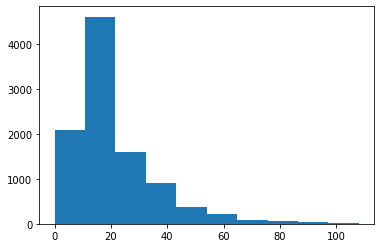

In [151]:
df['review_lens'] = df['clean_review'].apply(len)
ax = plt.hist(x=df['review_lens'], bins=10)

Смотрим на стоп-слова

In [152]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Не думаю, что стоит убирать стоп-слова, потому что отзывы в основном очень короткие, в стоп-словах нет эмоционально окрашенных, значит, они нам не помешают. Посмотрим на то, как рейтинг зависит от длины отзыва.

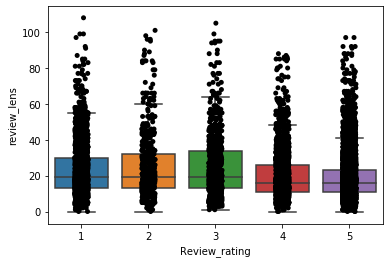

In [156]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='Review_rating', y='review_lens', data=df, showfliers=False, ax=ax)
sns.stripplot(x='Review_rating', y='review_lens', data=df, jitter=True, color='black', ax=ax)
plt.show()

Ну, как-то не особо. Хотя, наверное, всё верно: чем больше человеку понравилась обувь, тем более вероятно, что он напишет короткий отзыв (типа *круто, всем советую*), ведь если товар не понравилоя, человек распишет недостатки и свой гнев.

### Векторизация

In [158]:
corpus2 = df['clean_review']
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus2)
y = df['Review_rating'].values
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state=42)
bow = CountVectorizer()
X_bow = bow.fit_transform(corpus2)
y_bow = df['Review_rating'].values
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_bow, random_state=42)

### Логистическая регрессия на TF-IDF + подбор параметров

In [159]:
logreg = LogisticRegression(max_iter=400)
logreg_params = {'C': [0.5, 1.0, 1.5, 2.0],
                 'penalty' : ['l2', 'l1'],
                 'solver' : ['liblinear', 'saga'],
                 'fit_intercept': [True, False],
                 'class_weight': ['balanced', None],
                 'random_state': [0]}
logreg_cv = GridSearchCV(logreg,
                         param_grid=logreg_params,
                         cv=5,
                         n_jobs=-1)
logreg_cv.fit(X_train, y_train)

print('Best score: {}'.format(logreg_cv.best_score_))
print('Best parameters: {}'.format(logreg_cv.best_params_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best score: 0.6428762720942689
Best parameters: {'C': 2.0, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'random_state': 0, 'solver': 'saga'}


### Логиситческая регрессия на BoW + подбор параметров

In [161]:
logreg_cv2 = GridSearchCV(logreg,
                         param_grid=logreg_params,
                         cv=5,
                         n_jobs=-1)
logreg_cv2.fit(X_train_bow, y_train_bow)
print('Best score: {}'.format(logreg_cv2.best_score_))
print('Best parameters: {}'.format(logreg_cv2.best_params_))

Best score: 0.649437600428495
Best parameters: {'C': 2.0, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Мультиномиальный наивный Байсовский классификатор на TF-IDF + подбор параметров

In [162]:
mnb = MultinomialNB()

mnb_params = {'alpha': [0.1, 0.5, 1.0, 1.5]}

mnb_cv = GridSearchCV(mnb,
                      param_grid=mnb_params,
                      cv=5,
                      n_jobs=-1)
mnb_cv.fit(X_train, y_train)

print('Best score: {}'.format(mnb_cv.best_score_))
print('Best parameters: {}'.format(mnb_cv.best_params_))

Best score: 0.634841992501339
Best parameters: {'alpha': 0.5}


### Мультиномиальный наивный Байсовский классификатор на BoW + подбор параметров

In [163]:
mnb_cv2 = GridSearchCV(mnb,
                      param_grid=mnb_params,
                      cv=5,
                      n_jobs=-1)
mnb_cv2.fit(X_train_bow, y_train_bow)

print('Best score: {}'.format(mnb_cv2.best_score_))
print('Best parameters: {}'.format(mnb_cv2.best_params_))

Best score: 0.6368505623995715
Best parameters: {'alpha': 0.5}


## Результаты

Лучше всего работает Мультиномиальный наивный Байсовский классификатор на TF-IDF.

In [170]:
preds_2 = mnb_cv.predict(X_test)
acc = accuracy_score(preds_2, y_test)
micro_f1 = f1_score(preds_2, y_test, average = 'micro')
micro_p = precision_score(preds_2, y_test, average = 'micro')
micro_r = recall_score(preds_2, y_test, average = 'micro')
macro_f1 = f1_score(preds_2, y_test, average = 'macro')
macro_p = precision_score(preds_2, y_test, average = 'macro')
macro_r = recall_score(preds_2, y_test, average = 'macro')
print('acc={0:1.4f}'.format(acc))
print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

acc=0.6558
micro F1=0.6558, micro P=0.6558, micro R=0.6558
macro F1=0.4115, macro P=0.4101, macro R=0.5808



Матрица ошибок

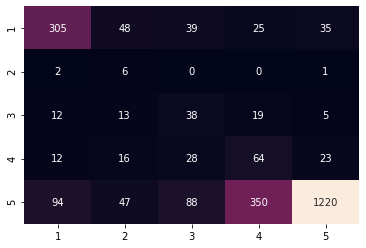

In [187]:
sns.heatmap(data=confusion_matrix(preds_2, y_test),
            annot=True,
            fmt="d",
            cbar=False,
            xticklabels = sorted(set(preds_2)),
            yticklabels = sorted(set(preds_2)))
plt.show()

Очень много правильно угаданных пятёрок, посмотрим какие оценки вообще есть в тестовой выборке.

In [189]:
ratings_test = Counter(y_test)

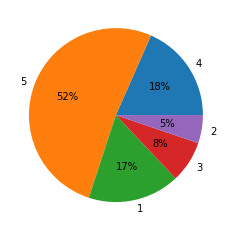

In [192]:
ratings = []
count = []
for k, v in ratings_test.items():
    ratings.append(k)
    count.append(v)
plt.pie(count, labels = ratings, autopct='%.0f%%')
plt.show()

Ну, пятёрок действительно половина от всех оценок, поэтому такое число - норм. А сколько каких оценок по всем данным?

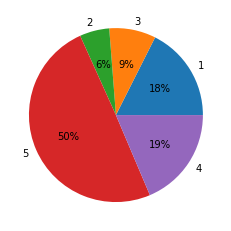

In [193]:
ratings_all = Counter(df['Review_rating'])
ratings = []
count = []
for k, v in ratings_all.items():
    ratings.append(k)
    count.append(v)
plt.pie(count, labels = ratings, autopct='%.0f%%')
plt.show()

Тут почти то же самое. Видимо, модель снова работает по принципу "ставь оценку повыше, в половине случаев не ошибёшься". Может быть, есть смысл выкинуть половину пятёрок из данных.